<a href="https://colab.research.google.com/github/doanminhkhue/ml/blob/main/hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÔ HÌNH ANN (MULTI LAYER PERCEPTRON CLASSIFIER VÀ ỨNG DỤNG PCA

## Ví dụ 1.

In [ ]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

In [ ]:
X.shape, y.shape

((2, 600), (600,))

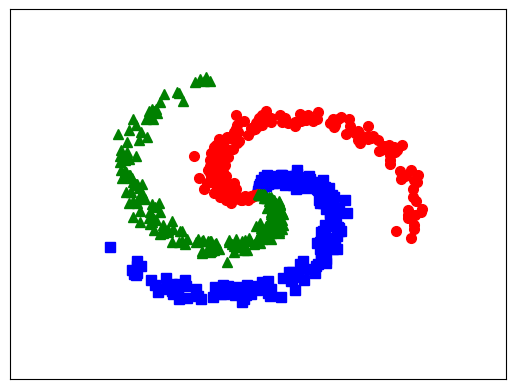

In [ ]:
# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

In [ ]:
def softmax_stable(V): #softmax stable
  e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
  Z = e_V / e_V.sum(axis = 0)
  return Z

#ham softmax (ko dungf)
def softmax(Z):
  e_Z = np.exp(Z)
  A = e_Z / e_Z.sum(axis = 0)

In [ ]:
# cost or loss function, ở đây loss = CE (multinomial)
def cost(Y, Yhat):
  return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [ ]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3): #chuyển nhãn sang dạng số (0,1,2)-> onehotmatrix(3xN)
  Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y

In [ ]:
#khởi tạo các giá trị cho bộ trọng số và các số kiến trúc mạng.
d0 = 2
#bổ sung 01 tầng hidden với số units của tầng này là 100.
d1 = h = 100
# size of hidden layer
d2 = C = 3
# initialize parameters randomly
#W1, b1: từ input -> hidden
W1 = 0.01*np.random.randn(d0, d1) #nhân 0.01 để w nhỏ, tránh ReLU vỡ bias, gradient to(big) -> loss nổ
b1 = np.zeros((d1, 1)) # ma trận toàn 0, 1 cột, d1 hàng
#W2, b2: từ hidden -> output
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [ ]:
X.shape, y.shape, Y.shape

((2, 600), (600,), (3, 600))

In [ ]:
W1.shape, b1.shape, W2.shape, b2.shape

((2, 100), (100, 1), (100, 3), (3, 1))

In [ ]:
for i in range(10000):
  ## Feedforward
  Z1 = np.dot(W1.T, X) + b1
  A1 = np.maximum(Z1, 0) #f(z) = ReLU
  Z2 = np.dot(W2.T, A1) + b2
  Yhat = softmax_stable(Z2)
  # print loss after each 1000 iterations
  if i %1000 == 0:
    # compute the loss: average cross-entropy loss
    loss = cost(Y, Yhat)
    print("iter %d, loss: %f" %(i, loss))

  # backpropagation
  E2 = (Yhat - Y )/N
  dW2 = np.dot(A1, E2.T)
  db2 = np.sum(E2, axis = 1, keepdims = True)
  E1 = np.dot(W2, E2)
  E1[Z1 <= 0] = 0 # gradient of ReLU
  dW1 = np.dot(X, E1.T)
  db1 = np.sum(E1, axis = 1, keepdims = True)

  # Gradient Descent update
  W1 += -eta*dW1
  b1 += -eta*db1
  W2 += -eta*dW2
  b2 += -eta*db2

iter 0, loss: 1.098665
iter 1000, loss: 0.109882
iter 2000, loss: 0.040606
iter 3000, loss: 0.029441
iter 4000, loss: 0.024335
iter 5000, loss: 0.021359
iter 6000, loss: 0.019371
iter 7000, loss: 0.017930
iter 8000, loss: 0.016822
iter 9000, loss: 0.015934


In [ ]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


(1, 14400)
200


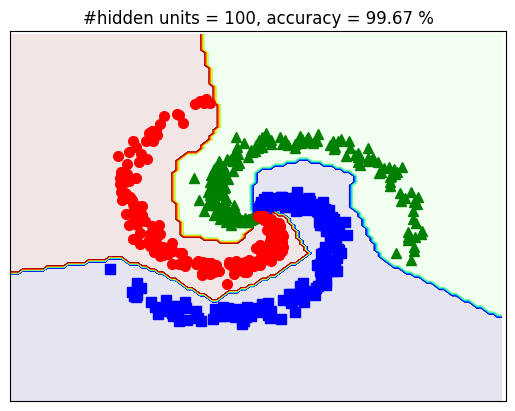

In [ ]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 200
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

## Bài tập ứng dụng 1.

### Huấn luyện và dự đoán trên cả 2 tập

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.datasets import load_iris
import time

In [ ]:
iris = load_iris()
# print(iris)
X = iris.data # Observed variable
Y = iris.target # Dependent variable (label)

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

X_train_list, y_train_list, X_val_list, y_val_list = [], [], [], []

for y_label in np.unique(Y):
  X_class = X[Y == y_label]
  y_class = Y[Y == y_label] # Get the labels for the current class
  X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_class, y_class, test_size = 0.2, random_state = 42)
  X_train_list.append(X_train_class)
  y_train_list.append(y_train_class)
  X_val_list.append(X_val_class)
  y_val_list.append(y_val_class)

X_train = np.concatenate(X_train_list, axis=0)
Y_train = np.concatenate(y_train_list, axis=0)
X_val = np.concatenate(X_val_list, axis=0)
Y_val = np.concatenate(y_val_list, axis=0)

In [ ]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
def softmax(V):
  e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
  Z = e_V / e_V.sum(axis = 0)
  return Z
# cost or loss function
def cost(Y, Yhat):
  return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3): # Changed C to 3 for Iris dataset
  Y = sparse.coo_matrix((np.ones_like(y),
  (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y


In [ ]:
d0 = X_train.shape[1] # Input dimension based on number of features (4 for Iris)
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly (He initialization for ReLU)
W1 = np.random.randn(d0, d1) * np.sqrt(2/d0) # W1 will be (4, 100)
b1 = np.zeros((d1, 1))
W2 = np.random.randn(d1, d2) * np.sqrt(2/d1) # W2 will be (100, 3)
b2 = np.zeros((d2, 1))

Y = convert_labels(Y_train, C) # Use Y_train for one-hot encoding
N = X_train.shape[0] # N should be the number of training samples (120)
eta = 0.1 # learning rate

In [ ]:
W1.shape, b1.shape, W2.shape, b2.shape

((4, 100), (100, 1), (100, 3), (3, 1))

In [ ]:
for i in range(2000):
  ## Feedforward
  Z1 = np.dot(W1.T, X_train.T) + b1 # Transpose X_train for correct matrix multiplication
  A1 = np.maximum(Z1, 0)
  Z2 = np.dot(W2.T, A1) + b2
  Yhat = softmax(Z2)

  # print loss after each 1000 iterations
  if i % 200 == 0:
    # compute the loss: average cross-entropy loss
    loss = cost(Y, Yhat) # Use one-hot encoded Y
    print("iter %d, loss: %f" %(i, loss))

  # backpropagation
  E2 = (Yhat - Y)/N # Use one-hot encoded Y and N (number of samples)
  dW2 = np.dot(A1, E2.T)
  db2 = np.sum(E2, axis = 1, keepdims = True)
  E1 = np.dot(W2, E2)
  E1[Z1 <= 0] = 0 # gradient of ReLU
  dW1 = np.dot(X_train.T, E1.T) # Transpose X_train for correct backpropagation
  db1 = np.sum(E1, axis = 1, keepdims = True)

  # Gradient Descent update
  W1 += -eta*dW1
  b1 += -eta*db1
  W2 += -eta*dW2
  b2 += -eta*db2

iter 0, loss: 1.272929
iter 200, loss: 0.097391
iter 400, loss: 0.059644
iter 600, loss: 0.045631
iter 800, loss: 0.037807
iter 1000, loss: 0.032649
iter 1200, loss: 0.028920
iter 1400, loss: 0.026018
iter 1600, loss: 0.023742
iter 1800, loss: 0.021838


In [ ]:
#dự đoán train
Z1 = np.dot(W1.T, X_train.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)

#dự đoán val
Z1_val = np.dot(W1.T, X_val.T) + b1
A1_val = np.maximum(Z1_val, 0)
Z2_val = np.dot(W2.T, A1_val) + b2
val_pred = np.argmax(Z2_val, axis=0)

from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy import sparse
print("\n=== TRAINING SET ===")
print("Accuracy:", accuracy_score(Y_train, predicted_class))
print("Precision:", precision_score(Y_train, predicted_class, average='macro'))
print("Recall:", recall_score(Y_train, predicted_class, average='macro'))

print("\n=== VALIDATION SET ===")
print("Accuracy:", accuracy_score(Y_val, val_pred))
print("Precision:", precision_score(Y_val, val_pred, average='macro'))
print("Recall:", recall_score(Y_val, val_pred, average='macro'))


=== TRAINING SET ===
Accuracy: 0.9916666666666667
Precision: 0.991869918699187
Recall: 0.9916666666666667

=== VALIDATION SET ===
Accuracy: 0.9666666666666667
Precision: 0.9696969696969697
Recall: 0.9666666666666667


### Sử dụng mô hình hồi quy SoftMax và Naïve Bayes phù hợp để thực hiện phân loại. So sánh với mô hình ANN trên các tiêu chí: Thời gian training; Thời gian predict (tính trung bình); độ chính xác.

#### Phân loại bằng SoftMax

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
#gọi tvien
lr = LogisticRegression(solver='lbfgs')

#tzan train
start_train = time.time()
lr.fit(X_train, Y_train)
train_time_lr = time.time() - start_train #tzan training

#tzan pred trung bình
start_predict = time.time() #tính tzan pred trung bình trong 1000 lần
for _ in range(1000):
  lr.predict(X_val)
pred_time_lr = (time.time() - start_predict) / 1000

#độ chính xác
acc_lr = accuracy_score(Y_val, lr.predict(X_val))

print("SoftMax - training time: ", train_time_lr)
print("SoftMax - average predict time: ", pred_time_lr)
print("SoftMax - Accuracy: ", acc_lr)

SoftMax - training time:  0.010559558868408203
SoftMax - average predict time:  0.0001527717113494873
SoftMax - Accuracy:  0.9666666666666667


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
nb = GaussianNB()

#tzan train
start_train = time.time()
nb.fit(X_train, Y_train)
train_time_nb = time.time() - start_train

#tzan pred trung bình
start_predict = time.time() #tính tzan pred trung bình trong 1000 lần
for _ in range(1000):
  nb.predict(X_val)
pred_time_nb = (time.time() - start_predict) / 1000

#độ chính xác
acc_nb = accuracy_score(Y_val, nb.predict(X_val))

print("Naive Bayes - training time: ", train_time_nb)
print("Naive Bayes - average predict time: ", pred_time_nb)
print("Naive Bayes - Accuracy: ", acc_nb)


Naive Bayes - training time:  0.0017147064208984375
Naive Bayes - average predict time:  0.00024866938591003415
Naive Bayes - Accuracy:  0.9666666666666667


In [ ]:
def ann_predict(X):
    Z1 = np.dot(W1.T, X.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    return np.argmax(Z2, axis=0)


# đo predict time ANN
start_pred = time.time()
for _ in range(1000):
    ann_predict(X_val)
pred_time_ann = (time.time() - start_pred) / 1000

acc_ann = accuracy_score(Y_val, ann_predict(X_val))

print("ANN - average predict time: ", pred_time_ann)
print("ANN - Accuracy: ", acc_ann)

ANN - average predict time:  2.7325868606567383e-05
ANN - Accuracy:  0.9666666666666667


### Thay đổi số chiều layer ẩn lần lượt là 75, 50. Thực nghiệm lại và đánh giá sự thay đổi kết quả so với các thông số trong đoạn code đã cho. Hãy cho nhận xét về mối liên hệ giữa siêu tham số trên với kết quả dự đoán.

In [ ]:
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy import sparse

# ---------- data prep: 40 train / 10 val per class ----------
iris = load_iris()
X = iris.data
Y = iris.target
X = StandardScaler().fit_transform(X)

X_train_list, y_train_list, X_val_list, y_val_list = [], [], [], []
for lbl in np.unique(Y):
    Xc = X[Y == lbl]
    yc = Y[Y == lbl]
    X_tr, X_vl, y_tr, y_vl = train_test_split(Xc, yc, test_size=0.2, random_state=42)
    X_train_list.append(X_tr); y_train_list.append(y_tr)
    X_val_list.append(X_vl); y_val_list.append(y_vl)

X_train = np.concatenate(X_train_list, axis=0)   # (120,4)
Y_train = np.concatenate(y_train_list, axis=0)   # (120,)
X_val = np.concatenate(X_val_list, axis=0)       # (30,4)
Y_val = np.concatenate(y_val_list, axis=0)       # (30,)

# ---------- helpers ----------
def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    return e_V / e_V.sum(axis=0)

def convert_labels(y, C=3):
    Y = sparse.coo_matrix(
        (np.ones_like(y), (y, np.arange(len(y)))),
        shape=(C, len(y))
    ).toarray()
    return Y

def evaluate(y_true, y_pred):
    return {
        'acc': accuracy_score(y_true, y_pred),
        'prec': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'rec': recall_score(y_true, y_pred, average='macro', zero_division=0)
    }

# ---------- ANN train/predict function ----------
def train_ann(hidden_size, X_train, Y_train, X_val, Y_val,
              epochs=2000, eta=0.1, print_every=500, random_seed=1):
    np.random.seed(random_seed)
    d0 = X_train.shape[1]
    d1 = hidden_size
    d2 = 3

    W1 = np.random.randn(d0, d1) * np.sqrt(2/d0)
    b1 = np.zeros((d1, 1))
    W2 = np.random.randn(d1, d2) * np.sqrt(2/d1)
    b2 = np.zeros((d2, 1))

    Y_onehot = convert_labels(Y_train, d2)
    N = X_train.shape[0]

    # train
    t0 = time.time()
    for i in range(epochs):
        Z1 = np.dot(W1.T, X_train.T) + b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)

        if (i % print_every) == 0:
            loss = -np.sum(Y_onehot * np.log(Yhat + 1e-12)) / N
            print(f"[h={d1}] iter {i}, loss={loss:.6f}")

        E2 = (Yhat - Y_onehot) / N
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis=1, keepdims=True)

        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0
        dW1 = np.dot(X_train.T, E1.T)
        db1 = np.sum(E1, axis=1, keepdims=True)

        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2
    train_time = time.time() - t0

    # predictions
    def predict(X):
        Z1p = np.dot(W1.T, X.T) + b1
        A1p = np.maximum(Z1p, 0)
        Z2p = np.dot(W2.T, A1p) + b2
        return np.argmax(Z2p, axis=0)

    # measure predict time (average over repeats)
    repeats = 1000
    t1 = time.time()
    for _ in range(repeats):
        _ = predict(X_val)
    pred_time = (time.time() - t1) / repeats

    # eval on train & val
    pred_train = predict(X_train)
    pred_val = predict(X_val)
    eval_train = evaluate(Y_train, pred_train)
    eval_val = evaluate(Y_val, pred_val)

    return {
        'hidden': d1,
        'train_time': train_time,
        'pred_time_avg': pred_time,
        'train_eval': eval_train,
        'val_eval': eval_val
    }

# ---------- run experiments ----------
hidden_sizes = [25, 50, 75]   # 25 is the original config
results = []
for h in hidden_sizes:
    print("\n==============================")
    print("Training ANN with hidden =", h)
    res = train_ann(h, X_train, Y_train, X_val, Y_val,
                    epochs=2000, eta=0.1, print_every=1000, random_seed=42)
    results.append(res)

# ---------- print summary ----------
print("\n\n===== SUMMARY =====")
for r in results:
    print(f"\nhidden = {r['hidden']}")
    print(f" training time (s): {r['train_time']:.4f}")
    print(f" avg predict time (s): {r['pred_time_avg']:.8f}")
    tr = r['train_eval']; vl = r['val_eval']
    print(f" TRAIN => acc: {tr['acc']:.4f}, prec: {tr['prec']:.4f}, rec: {tr['rec']:.4f}")
    print(f" VAL   => acc: {vl['acc']:.4f}, prec: {vl['prec']:.4f}, rec: {vl['rec']:.4f}")



Training ANN with hidden = 25
[h=25] iter 0, loss=1.562994
[h=25] iter 1000, loss=0.046211

Training ANN with hidden = 50
[h=50] iter 0, loss=1.553807
[h=50] iter 1000, loss=0.043059

Training ANN with hidden = 75
[h=75] iter 0, loss=2.028394
[h=75] iter 1000, loss=0.037517


===== SUMMARY =====

hidden = 25
 training time (s): 0.5021
 avg predict time (s): 0.00003126
 TRAIN => acc: 0.9833, prec: 0.9833, rec: 0.9833
 VAL   => acc: 0.9667, prec: 0.9697, rec: 0.9667

hidden = 50
 training time (s): 0.7662
 avg predict time (s): 0.00002899
 TRAIN => acc: 0.9833, prec: 0.9833, rec: 0.9833
 VAL   => acc: 0.9667, prec: 0.9697, rec: 0.9667

hidden = 75
 training time (s): 0.6795
 avg predict time (s): 0.00003345
 TRAIN => acc: 0.9917, prec: 0.9919, rec: 0.9917
 VAL   => acc: 0.9667, prec: 0.9697, rec: 0.9667


## Ví dụ 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train-images-idx3-ubyte.gz to train-images-idx3-ubyte.gz
Saving t10k-images-idx3-ubyte.gz to t10k-images-idx3-ubyte.gz
Saving train-labels-idx1-ubyte.gz to train-labels-idx1-ubyte.gz
Saving t10k-labels-idx1-ubyte.gz to t10k-labels-idx1-ubyte.gz


In [ ]:
import os
import numpy as np
import time
# train path
train_images_path = '/content/train-images-idx3-ubyte.gz'
train_labels_path = '/content/train-labels-idx1-ubyte.gz'
# test path
test_images_path = '/content/t10k-images-idx3-ubyte.gz'
test_labels_path = '/content/t10k-labels-idx1-ubyte.gz'

### Giảm số chiều dữ liệu xuống còn 125 chiều (từ 28x28 = 784 chiều ban đầu) với tập dữ liệu 5000 ảnh bất kỳ.

In [ ]:
from sklearn.decomposition import PCA
# Hàm đọc dữ liệu
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
  # read data
  import gzip # to decompress gz (zip) file
  # open file training to read training data
  f_images = gzip.open(images_path,'r')
  # skip 16 first bytes because these are not data, only header infor
  f_images.read(16)
  # general: read num_images data samples if this parameter is set;
  # if not, read all (60000 training or 10000 test)
  real_num = num_images if not shuffle else (60000 if _is else 10000)
  # read all data to buf_images (28x28xreal_num)
  buf_images = f_images.read(image_size * image_size * real_num)
  # images
  images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
  images = images.reshape(real_num, image_size, image_size,)
  # Read labels
  f_labels = gzip.open(labels_path,'r')
  f_labels.read(8)
  labels = np.zeros((real_num)).astype(np.int64)
  # rearrange to correspond the images and labels
  for i in range(0, real_num):
    buf_labels = f_labels.read(1)
    labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
  # shuffle to get random images data
  if shuffle is True:
    rand_id = np.random.randint(real_num, size=num_images)
    images = images[rand_id, :]
    labels = labels[rand_id,]
  # change images data to type of vector 28x28 dimentional
  images = images.reshape(num_images, image_size * image_size)
  return images, labels

# Lấy tập dữ liệu 5000 ảnh bất kỳ, ở đây lấy dữ liệu ở tập train
images, imag_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)

#Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
images = scaler.fit_transform(images)

print(f"Images.shape ban đầu: {images.shape}\n")

#Giảm chiều dữ liệu
pca = PCA(n_components=100)
images_pca = pca.fit_transform(images)
print(f"Images.shape sau khi giảm chiều: {images_pca.shape}\n")


/tmp/ipython-input-3978558260.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


Images.shape ban đầu: (5000, 784)

Images.shape sau khi giảm chiều: (5000, 100)



### b + c. Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression và ANN (đã có code) để phân loại cho tập dữ liệu giảm chiều nói trên, tỷ lệ train:test là 0.7:0.3. So sánh hai mô hình về các tiêu chí: Thời gian thực hiện; Độ chính xác.

In [ ]:
X_pca = images_pca
y_pca = imag_labels
from sklearn.model_selection import train_test_split

#### Multinomial Logistic Regression

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((3500, 100), (1500, 100), (3500,), (1500,))

In [ ]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ===== Thêm cột 1 (bias) =====
X_train_pca = np.hstack([np.ones((X_train_pca.shape[0], 1)), X_train_pca])
X_test_pca  = np.hstack([np.ones((X_test_pca.shape[0], 1)), X_test_pca])

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = e_Z / e_Z.sum(axis=0)
    return A

def custom_softmax_regression(X, y_labels, W_init, eta, tol=1e-4, max_count=10000):
    W = [W_init]
    C = W_init.shape[1]
    Y_onehot = convert_labels(y_labels, C)

    N = X.shape[1]   # samples
    d = X.shape[0]   # features

    count = 0
    check_w_after = 120

    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y_onehot[:, i].reshape(C, 1)

            ai = softmax_stable(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta * xi.dot((yi - ai).T)

            count += 1

            # stopping
            if count >= check_w_after and count % check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W

            W.append(W_new)
    return W

def cost(Y_true, Yhat_pred):
    return -np.sum(Y_true * np.log(Yhat_pred + 1e-12)) / Y_true.shape[1]

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)

from scipy import sparse
def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y


# ===== Training Time =====
C = 10
d = X_train_pca.shape[1]
W_init = np.random.randn(d, C)

start_train = time.time()
W = custom_softmax_regression(X_train_pca.T, y_train_pca, W_init, eta)
end_train = time.time()
train_time = end_train - start_train

W_final = W[-1]

print(f"\nTraining time: {train_time:.4f} s")


# ===== Predict Time =====
start_pred = time.time()
y_pred = pred(W_final, X_test_pca.T)
end_pred = time.time()

predict_time = end_pred - start_pred
predict_time_avg = predict_time / len(X_test_pca)

print(f"Total predict time: {predict_time:.4f} s")
print(f"Average predict time per sample: {predict_time_avg:.8f} s")


# ===== Evaluation =====
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_pca, y_pred))

print("\nClassification Report:")
target_names_mnist = [str(i) for i in range(C)]
print(classification_report(y_test_pca, y_pred, target_names=target_names_mnist))

print("Accuracy:", accuracy_score(y_test_pca, y_pred))



Training time: 0.3181 s
Total predict time: 0.0014 s
Average predict time per sample: 0.00000095 s

Confusion Matrix:
[[153   0   0   1   0   2   2   2   0   0]
 [  0 152   2   2   0   0   0   1   4   1]
 [  2   2 122   3   3   1   2   2   1   2]
 [  0   0  11 130   3  12   0   3   4   3]
 [  0   1   1   2 148   0   2   1   3   5]
 [  2   1   1   1   0 127   3   0   3   3]
 [  2   0   3   0   2   1 123   0   1   1]
 [  2   2   4   1   4   1   0 130   0   7]
 [  0   8   1   3   2   5   4   2 117   2]
 [  1   1   0   3   7   2   1   8   5 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       160
           1       0.91      0.94      0.92       162
           2       0.84      0.87      0.86       140
           3       0.89      0.78      0.83       166
           4       0.88      0.91      0.89       163
           5       0.84      0.90      0.87       141
           6       0.90      0.92      0.91    

#### ANN

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((3500, 100), (1500, 100), (3500,), (1500,))

In [ ]:
def softmax(V):
  e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
  Z = e_V / e_V.sum(axis = 0)
  return Z
# cost or loss function
def cost(Y, Yhat):
  return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## One-hot coding
from scipy import sparse
def convert_labels(y, C):
  Y = sparse.coo_matrix((np.ones_like(y),
  (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y
def evaluate(y_true, y_pred):
    return {
        'acc': accuracy_score(y_true, y_pred),
        'prec': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'rec': recall_score(y_true, y_pred, average='macro', zero_division=0)
    }

def train_ann(hidden_size, X_train, Y_train, X_val, Y_val,
              epochs=2000, eta=0.1, print_every=500, random_seed=1):
    np.random.seed(random_seed)
    d0 = X_train.shape[1]
    d1 = hidden_size
    d2 = 10

    W1 = np.random.randn(d0, d1) * np.sqrt(2/d0)
    b1 = np.zeros((d1, 1))
    W2 = np.random.randn(d1, d2) * np.sqrt(2/d1)
    b2 = np.zeros((d2, 1))

    Y_onehot = convert_labels(Y_train, d2)
    N = X_train.shape[0]

    # train
    t0 = time.time()
    for i in range(epochs):
        Z1 = np.dot(W1.T, X_train.T) + b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)

        if (i % print_every) == 0:
            loss = -np.sum(Y_onehot * np.log(Yhat + 1e-12)) / N
            print(f"[h={d1}] iter {i}, loss={loss:.6f}")

        E2 = (Yhat - Y_onehot) / N
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis=1, keepdims=True)

        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0
        dW1 = np.dot(X_train.T, E1.T)
        db1 = np.sum(E1, axis=1, keepdims=True)

        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2
    train_time = time.time() - t0

    # predictions
    def predict(X):
      Z1p = np.dot(W1.T, X.T) + b1
      A1p = np.maximum(Z1p, 0)
      Z2p = np.dot(W2.T, A1p) + b2
      return np.argmax(Z2p, axis=0)

    y_pred = predict(X_val)


### c. So sánh hai mô hình về các tiêu chí: Thời gian thực hiện; Độ chính xác.

- MLR nhanh hơn ANN
- ANN chính xác hơn MLR

### Thực hiện lại mô hình ANN với số chiều tầng ẩn là 150. Thực hiện dự đoán trên cả 2 tập và đánh giá về kết quả.